# Chapter 6: Visualization

## Introducing the Basics of Matplotlib

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
%matplotlib inline

### Curve plotting

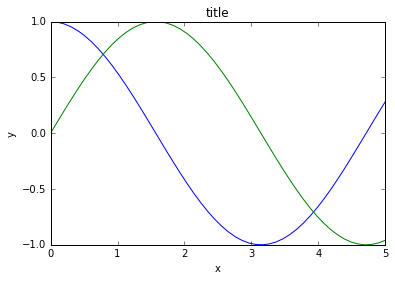

In [3]:
# Curve plotting
import numpy as np
import matplotlib.pyplot as plt
x = np.linspace(0, 5, 50)
y_cos = np.cos(x)
y_sin = np.sin(x)

plt.figure() # initialize a figure
plt.plot(x,y_cos) # plot series of coordinates as a line
plt.plot(x,y_sin)
plt.xlabel('x') # adds label to x axis
plt.ylabel('y') # adds label to y axis
plt.title('title') # adds a title
plt.show() # close a figure


In [4]:
list(mpl.rcParams['axes.prop_cycle'])

[{'color': 'b'},
 {'color': 'g'},
 {'color': 'r'},
 {'color': 'c'},
 {'color': 'm'},
 {'color': 'y'},
 {'color': 'k'}]

In [5]:
# Use the following command only if you want to change the colour sequence
# mpl.rcParams['axes.prop_cycle'] = mpl.cycler('color', ['blue', 'red', 'green'])

### Using panels

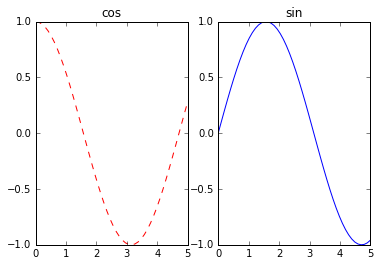

In [6]:
# Using panels
import matplotlib.pyplot as plt
plt.subplot(1,2,1) # defines 1 row 2 column panel, activates figure 1
plt.plot(x,y_cos,'r--')
plt.title('cos') # adds a title
plt.subplot(1,2,2) # defines 1 row 2 column panel, activates figure 2
plt.plot(x,y_sin,'b-')
plt.title('sin') 
plt.show()

# Some references for further personalizations:
# http://matplotlib.org/api/lines_api.html#matplotlib.lines.Line2D.set_linestyle
# http://matplotlib.org/api/colors_api.html
# http://matplotlib.org/api/markers_api.html
# http://matplotlib.org/api/lines_api.html#matplotlib.lines.Line2D

# It is possible to have customer colors by RGB values (in range [0-1])
# plt.plot(x,y_sin,'b-',color = (0.1,0.9,0.9))
# The curve's color will be cyan

### Scatterplots

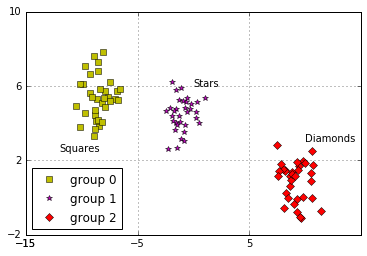

In [7]:
# Scatterplot
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

D = make_blobs(n_samples=100, n_features=2, centers=3, random_state=7)
groups = D[1]
coordinates = D[0]

plt.plot(coordinates[groups==0,0], coordinates[groups==0,1], 'ys', label='group 0') # yellow square
plt.plot(coordinates[groups==1,0], coordinates[groups==1,1], 'm*', label='group 1') # magenta stars
plt.plot(coordinates[groups==2,0], coordinates[groups==2,1], 'rD', label='group 2') # red diamonds
plt.ylim(-2,10) # redefines the limits of y axis
plt.yticks([10,6,2,-2]) # redefines y axis ticks
plt.xticks([-15,-5,5,-15]) # redefines x axis ticks
plt.grid() # adds a grid
plt.annotate('Squares', (-12,2.5)) # prints text at coordinates
plt.annotate('Stars', (0,6))
plt.annotate('Diamonds', (10,3))
plt.legend(loc='lower left', numpoints= 1) # places a legend of labelled items
plt.show()

### Histograms

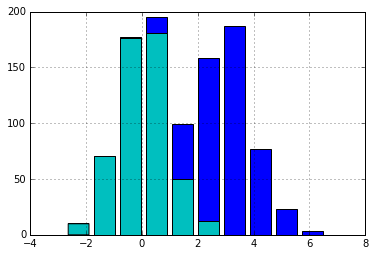

In [8]:
# Histograms
import numpy as np
import matplotlib.pyplot as plt
x = np.random.normal(loc=0.0, scale=1.0, size=500)
z = np.random.normal(loc=3.0, scale=1.0, size=500)
plt.hist(np.column_stack((x,z)), bins=10, histtype='bar', color = ['c','b'], stacked=True)
plt.grid()
plt.show()

# Also try these further parameters for plt.hist
# normed=1
# histtype='step'
# stacked = False
# fill = False

### Bar graphs

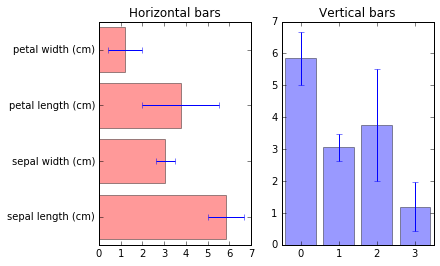

In [9]:
# Bar graphs
from sklearn.datasets import load_iris
import numpy as np
import matplotlib.pyplot as plt
iris = load_iris()
average = np.mean(iris.data, axis=0) 
std     = np.std(iris.data, axis=0) 
range_  = range(np.shape(iris.data)[1])

plt.subplot(1,2,1) # defines 1 row 2 column panel, activates figure 1
plt.title('Horizontal bars')
plt.barh(range_,average, color="r", xerr=std, alpha=0.4, align="center")
plt.yticks(range_, iris.feature_names)
plt.subplot(1,2,2) # defines 1 row 2 column panel, activates figure 2
plt.title('Vertical bars')
plt.bar(range_,average, color="b", yerr=std, alpha=0.4, align="center")
plt.xticks(range_, range_)
plt.show()

### Image visualization

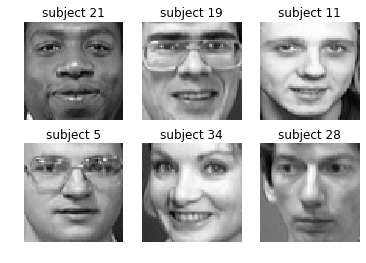

In [10]:
# Image visualization: Olivetti dataset
from sklearn.datasets import fetch_olivetti_faces
import numpy as np
import matplotlib.pyplot as plt
dataset = fetch_olivetti_faces(shuffle=True, random_state=5)
photo = 1
for k in range(6):
    plt.subplot(2,3,k+1)
    plt.imshow(dataset.data[k].reshape(64,64), cmap=plt.cm.gray, 
               interpolation='nearest')
    plt.title('subject '+str(dataset.target[k]))
    plt.axis('off')
plt.show()

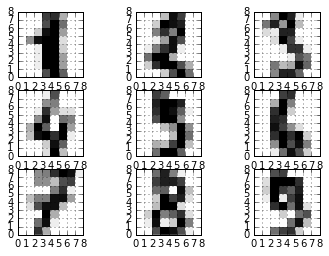

In [11]:
# Image visualization: handwritten digits
from sklearn.datasets import load_digits
digits = load_digits()
for number in range(1,10):
    plt.subplot(3, 3, number)
    plt.imshow(digits.images[number],cmap='binary',
               interpolation='none', extent=[0,8,0,8])
    plt.grid()
plt.show()

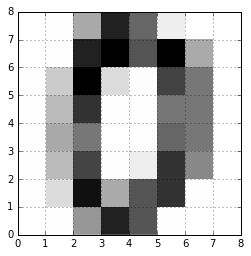

In [12]:
# Image visualization: handwritten digits, a close up 
plt.imshow(digits.images[0],cmap='binary',interpolation='none', extent=[0,8,0,8])
# Extent defines the images max and min of the horizontal and vertical values
plt.grid()
plt.show()

## Selected Graphical Examples with pandas

In [13]:
import pandas as pd
print ('Your pandas version is: %s' % pd.__version__)
from sklearn.datasets import load_iris
iris = load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
groups = list(iris.target)
iris_df['groups'] = pd.Series([iris.target_names[k] for k in groups])

Your pandas version is: 0.18.1


### Boxplots and histograms

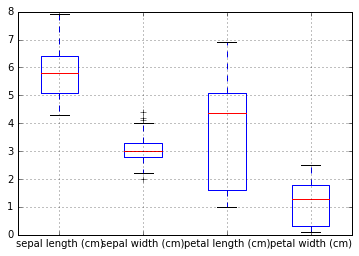

In [14]:
boxplots = iris_df.boxplot(return_type='axes')

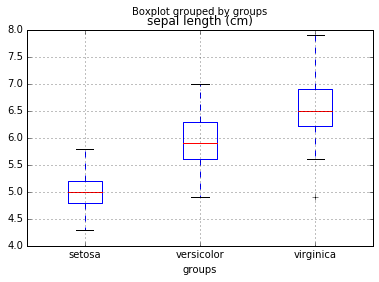

In [15]:
boxplots = iris_df.boxplot(column='sepal length (cm)', by='groups', return_type='axes')

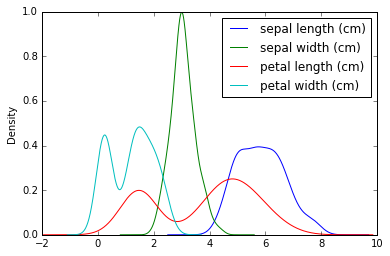

In [16]:
densityplot = iris_df.plot(kind='density')

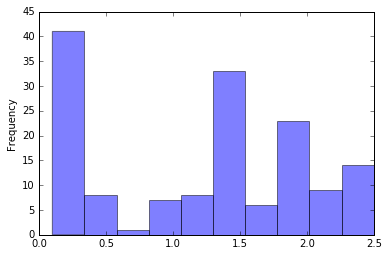

In [17]:
single_distribution = iris_df['petal width (cm)'].plot(kind='hist', alpha=0.5)

### Scatterplots

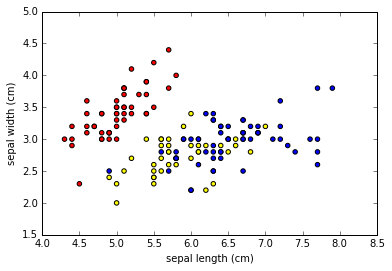

In [18]:
colors_palette = {0: 'red', 1: 'yellow', 2:'blue'}
colors = [colors_palette[c] for c in groups]
simple_scatterplot = iris_df.plot(kind='scatter', x=0, y=1, c=colors)

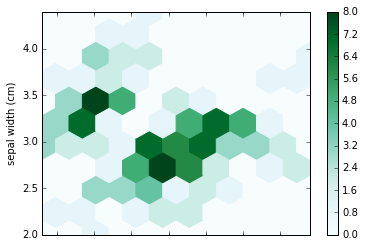

In [19]:
hexbin = iris_df.plot(kind='hexbin', x=0, y=1, gridsize=10)

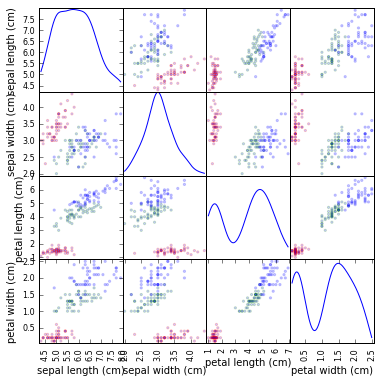

In [20]:
from pandas.tools.plotting import scatter_matrix
colors_palette = {0: "red", 1: "green", 2: "blue"}
colors = [colors_palette[c] for c in groups]   
matrix_of_scatterplots = scatter_matrix(iris_df, alpha=0.2, figsize=(6, 6), color=colors, diagonal='kde')

### Parallel coordinates

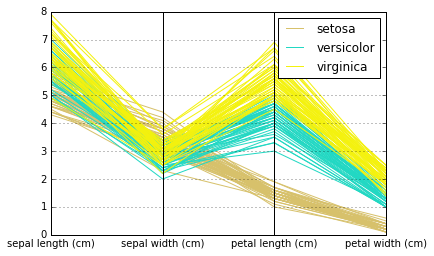

In [21]:
from pandas.tools.plotting import parallel_coordinates
iris_df['groups'] = [iris.target_names[k] for k in groups]
pll = parallel_coordinates(iris_df,'groups')

# Introducing Seaborn

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

In [23]:
import seaborn as sns
sns.set()

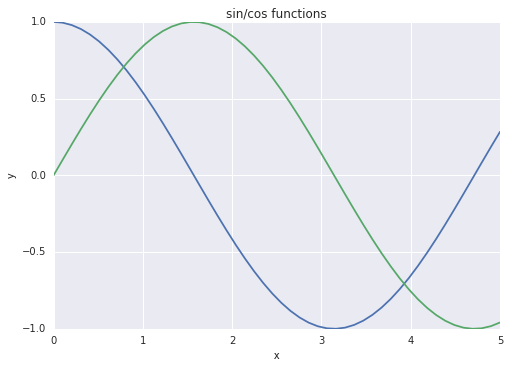

In [24]:
x = np.linspace(0, 5, 50)
y_cos = np.cos(x)
y_sin = np.sin(x)
plt.figure()
plt.plot(x,y_cos)
plt.plot(x,y_sin)
plt.xlabel('x')
plt.ylabel('y')
plt.title('sin/cos functions')
plt.show()

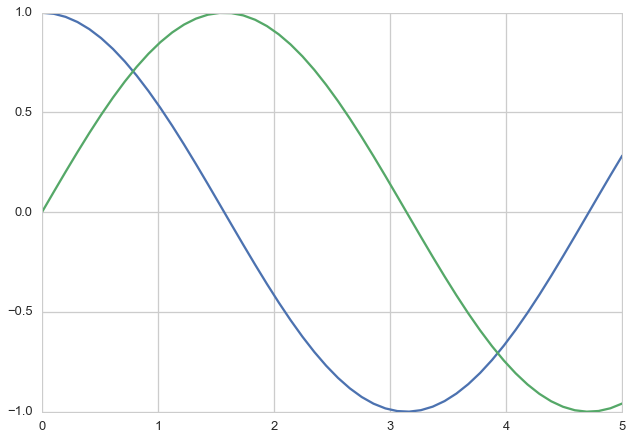

In [25]:
sns.set_context("talk")
with sns.axes_style('whitegrid'):
    plt.figure()
    plt.plot(x,y_cos)
    plt.plot(x,y_sin)
    plt.show()
sns.set()

[(0.2980392156862745, 0.4470588235294118, 0.6901960784313725), (0.3333333333333333, 0.6588235294117647, 0.40784313725490196), (0.7686274509803922, 0.3058823529411765, 0.3215686274509804), (0.5058823529411764, 0.4470588235294118, 0.6980392156862745), (0.8, 0.7254901960784313, 0.4549019607843137), (0.39215686274509803, 0.7098039215686275, 0.803921568627451)]


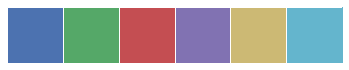

In [26]:
current_palette = sns.color_palette()
print (current_palette)
sns.palplot(current_palette)

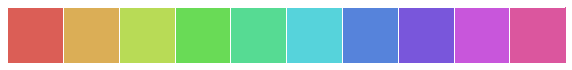

In [27]:
new_palette=sns.color_palette('hls', 10)
sns.palplot(new_palette)

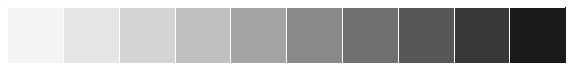

In [28]:
your_palette = sns.choose_colorbrewer_palette('sequential')

In [29]:
print (your_palette)

[(0.95755478915046244, 0.95755478915046244, 0.95755478915046244), (0.90120723387774304, 0.90120723387774304, 0.90120723387774304), (0.83289505032932054, 0.83289505032932054, 0.83289505032932054), (0.75021916137022127, 0.75021916137022127, 0.75021916137022127), (0.64341409276513495, 0.64341409276513495, 0.64341409276513495), (0.53871589525073182, 0.53871589525073182, 0.53871589525073182), (0.44032295626752516, 0.44032295626752516, 0.44032295626752516), (0.34288351570858677, 0.34288351570858677, 0.34288351570858677), (0.22329873945198808, 0.22329873945198808, 0.22329873945198808), (0.1046981975144031, 0.1046981975144031, 0.1046981975144031)]


## Enhancing your EDA capabilities

In [30]:
import seaborn as sns
sns.set()

In [31]:
from sklearn.datasets import load_iris
iris = load_iris()
X_iris, y_iris = iris.data, iris.target
features_iris = [a[:-5].replace(' ','_') for a in iris.feature_names]
target_labels = {j: flower for j, flower in enumerate(iris.target_names)}
df_iris = pd.DataFrame(X_iris, columns=features_iris)
df_iris['target'] = [target_labels[y] for y in y_iris]

In [32]:
from sklearn.datasets import load_boston
boston = load_boston()
X_boston, y_boston = boston.data, boston.target
features_boston = np.array(['V'+'_'.join([str(b), a]) 
    for a,b in zip(boston.feature_names,range(len(boston.feature_names)))])
df_boston = pd.DataFrame(X_boston, columns=features_boston)
df_boston['target'] = y_boston
df_boston['target_level'] = pd.qcut(y_boston,3)

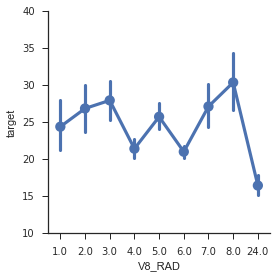

In [33]:
with sns.axes_style("ticks"):
    sns.factorplot(data=df_boston, x='V8_RAD', y="target")  

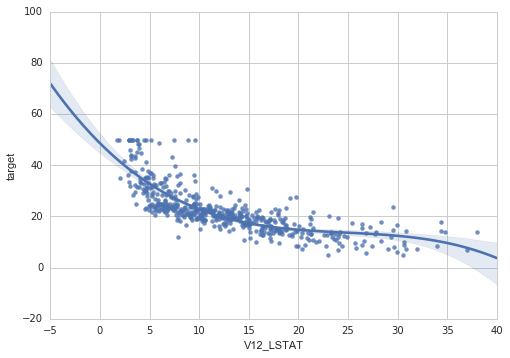

In [34]:
with sns.axes_style("whitegrid"):
    sns.regplot(data=df_boston, x='V12_LSTAT', y="target", order=3)

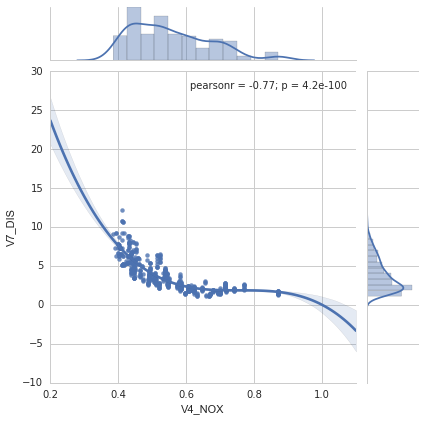

In [35]:
with sns.axes_style("whitegrid"):
    sns.jointplot("V4_NOX", "V7_DIS", data=df_boston, kind='reg',order=3) 

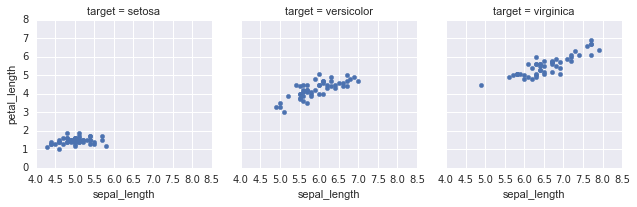

In [36]:
with sns.axes_style("darkgrid"):
    chart = sns.FacetGrid(df_iris, col="target")  
    chart.map(plt.scatter, "sepal_length", "petal_length")  

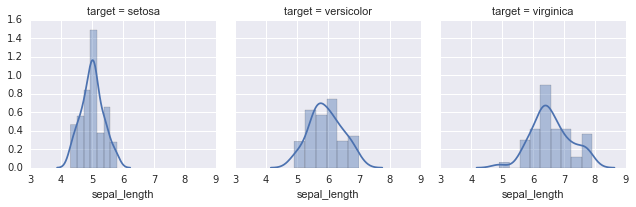

In [37]:
with sns.axes_style("darkgrid"):
    chart = sns.FacetGrid(df_iris, col="target")  
    chart.map(sns.distplot, "sepal_length")

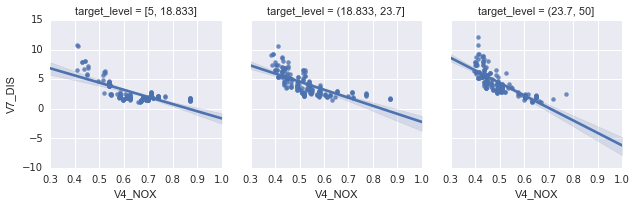

In [38]:
with sns.axes_style("darkgrid"):
    chart = sns.FacetGrid(df_boston, col="target_level")  
    chart.map(sns.regplot, "V4_NOX", "V7_DIS")

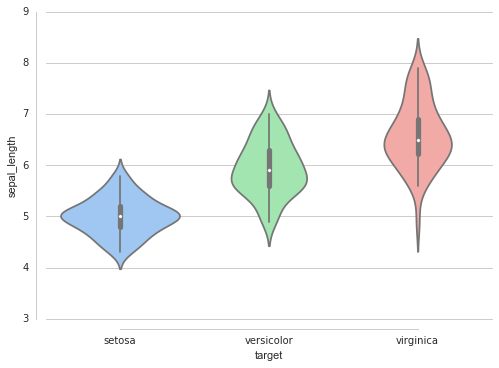

In [39]:
with sns.axes_style("whitegrid"):    
    ax = sns.violinplot(x="target", y="sepal_length",
                        data=df_iris, palette="pastel")
    sns.despine(offset=10, trim=True)

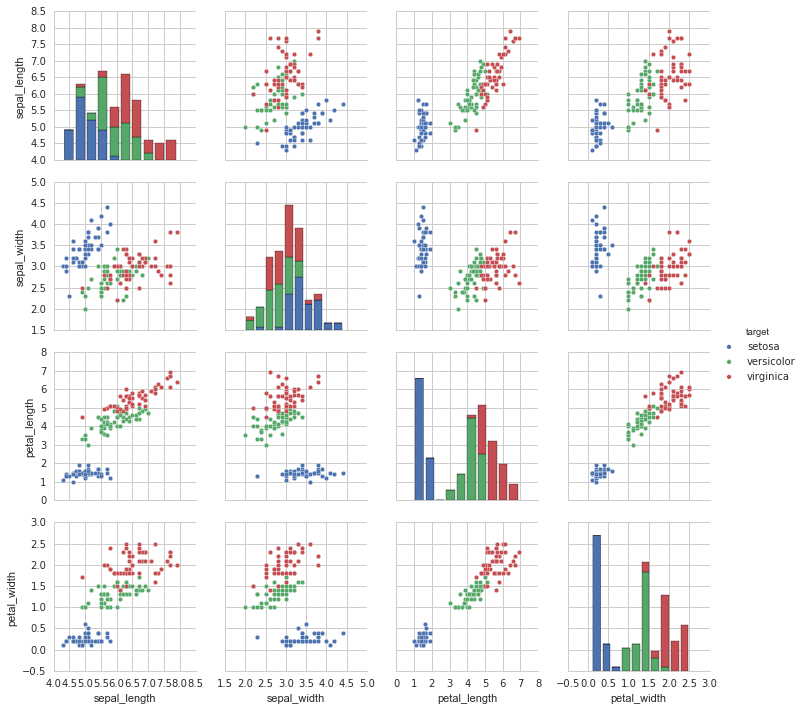

In [40]:
with sns.axes_style("whitegrid"):
    chart = sns.pairplot(data=df_iris, hue="target", diag_kind="hist")

# Introducing Bokeh for interactive visualizations on browsers

In [41]:
import bokeh
print(bokeh.__version__)

0.12.1


In [42]:
import numpy as np
from bokeh.plotting import figure, output_file, show

x = np.linspace(0, 5, 50)
y_cos = np.cos(x)

output_file("cosine.html")
p = figure()
p.line(x, y_cos, line_width=2)
show(p)

In [43]:
from bokeh.io import output_notebook, reset_output
reset_output()
output_notebook()

Loading BokehJS ...

In [50]:
p = figure()
p.line(x, y_cos, line_width=2)
show(p)

In [51]:
# Scatterplot from matplotlib to bokeh
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from bokeh import mpl
from bokeh.plotting import show

D = make_blobs(n_samples=100, n_features=2, centers=3, random_state=7)
coord, groups = D[0], D[1]

plt.plot(coord[groups==0,0], coord[groups==0,1], 'ys') 
plt.plot(coord[groups==1,0], coord[groups==1,1], 'm*')
plt.plot(coord[groups==2,0], coord[groups==2,1], 'rD')
plt.grid()
plt.annotate('Squares', (-12,2.5))
plt.annotate('Stars', (0,6))
plt.annotate('Diamonds', (10,3))

show(mpl.to_bokeh())

## Advanced Data Learning Representation

### Learning curves

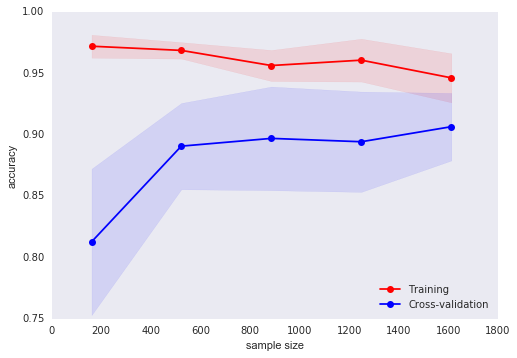

In [46]:
# Learning curve
import numpy as np
from sklearn.learning_curve import learning_curve, validation_curve
from sklearn.datasets import load_digits
from sklearn.linear_model import SGDClassifier
digits = load_digits()
X, y = digits.data, digits.target
hypothesis = SGDClassifier(loss='log', shuffle=True, n_iter=5, penalty='l2', alpha=0.0001, random_state=3)
train_size, train_scores, test_scores = learning_curve(hypothesis, X, y, train_sizes=np.linspace(0.1,1.0,5), 
                                                       cv=10, scoring='accuracy', exploit_incremental_learning=False, n_jobs=-1)
mean_train  = np.mean(train_scores,axis=1)
upper_train = np.clip(mean_train + np.std(train_scores,axis=1),0,1)
lower_train = np.clip(mean_train - np.std(train_scores,axis=1),0,1)
mean_test   = np.mean(test_scores,axis=1)
upper_test = np.clip(mean_test + np.std(test_scores,axis=1),0,1)
lower_test = np.clip(mean_test - np.std(test_scores,axis=1),0,1)
plt.plot(train_size,mean_train,'ro-', label='Training')
plt.fill_between(train_size, upper_train, lower_train, alpha=0.1, color='r')
plt.plot(train_size,mean_test,'bo-', label='Cross-validation')
plt.fill_between(train_size, upper_test, lower_test, alpha=0.1, color='b')
plt.grid()
plt.xlabel('sample size') # adds label to x axis
plt.ylabel('accuracy') # adds label to y axis
plt.legend(loc='lower right', numpoints= 1)
plt.show()

### Validation curves

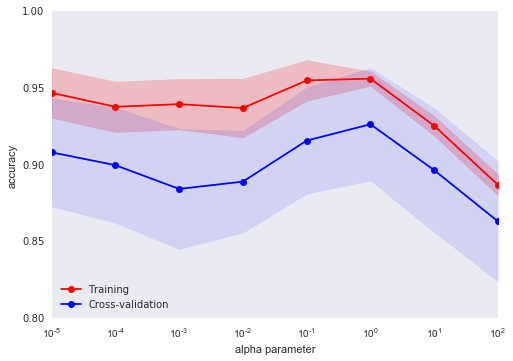

In [47]:
# Validation curves
from sklearn.learning_curve import validation_curve
testing_range = np.logspace(-5,2,8)
hypothesis = SGDClassifier(loss='log', shuffle=True, n_iter=5, penalty='l2', alpha=0.0001, random_state=3)
train_scores, test_scores = validation_curve(hypothesis, X, y, 'alpha', param_range=testing_range, cv=10, scoring='accuracy', n_jobs=-1)
mean_train  = np.mean(train_scores,axis=1)
upper_train = np.clip(mean_train + np.std(train_scores,axis=1),0,1)
lower_train = np.clip(mean_train - np.std(train_scores,axis=1),0,1)
mean_test   = np.mean(test_scores,axis=1)
upper_test = np.clip(mean_test + np.std(test_scores,axis=1),0,1)
lower_test = np.clip(mean_test - np.std(test_scores,axis=1),0,1)
plt.semilogx(testing_range,mean_train,'ro-', label='Training')
plt.fill_between(testing_range, upper_train, lower_train, alpha=0.1, color='r')
plt.fill_between(testing_range, upper_train, lower_train, alpha=0.1, color='r')
plt.semilogx(testing_range,mean_test,'bo-', label='Cross-validation')
plt.fill_between(testing_range, upper_test, lower_test, alpha=0.1, color='b')
plt.grid()
plt.xlabel('alpha parameter') # adds label to x axis
plt.ylabel('accuracy') # adds label to y axis
plt.ylim(0.8,1.0)
plt.legend(loc='lower left', numpoints= 1)
plt.show()

### Feature importance

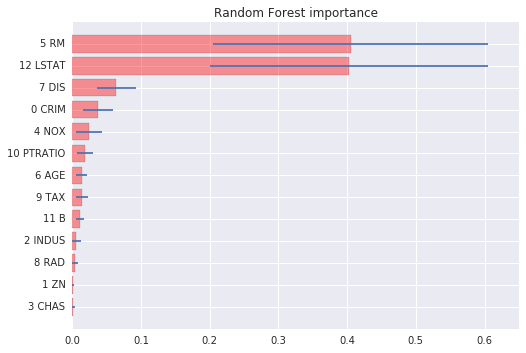

In [48]:
# Importance of variables
from sklearn.datasets import load_boston
boston = load_boston()
X, y = boston.data, boston.target
feature_names = np.array([' '.join([str(b), a]) for a,b in zip(boston.feature_names,range(len(boston.feature_names)))])
from sklearn.ensemble import RandomForestRegressor
RF = RandomForestRegressor(n_estimators=100, random_state=101).fit(X, y)
importance = np.mean([tree.feature_importances_ for tree in RF.estimators_],axis=0)
std = np.std([tree.feature_importances_ for tree in RF.estimators_],axis=0)
indices = np.argsort(importance)
range_ = range(len(importance))
plt.figure()
plt.title("Random Forest importance")
plt.barh(range_,importance[indices],
       color="r", xerr=std[indices], alpha=0.4, align="center")
plt.yticks(range(len(importance)), feature_names[indices])
plt.ylim([-1, len(importance)])
plt.xlim([0.0, 0.65])
plt.show()

### GBT partial dependence plot

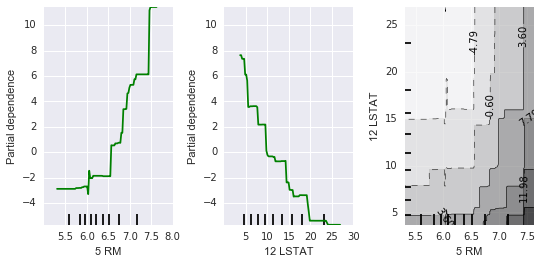

In [49]:
#  Partial dependence plots based on GBM
from sklearn.ensemble.partial_dependence import plot_partial_dependence
from sklearn.ensemble import GradientBoostingRegressor
GBM = GradientBoostingRegressor(n_estimators=100, random_state=101).fit(X, y)
features = [5,12,(5,12)]
fig, axs = plot_partial_dependence(GBM, X, features, feature_names=feature_names) 